In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

In [3]:
data = pd.read_excel(r'C:\Users\User\Desktop\default of credit card clients.xls')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
pd.set_option('display.max_columns', None)
data.describe(include = 'all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [7]:
data = data.drop(data[['ID']], axis=1)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,male,high school,single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,male,university,single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,male,high school,married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [9]:
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

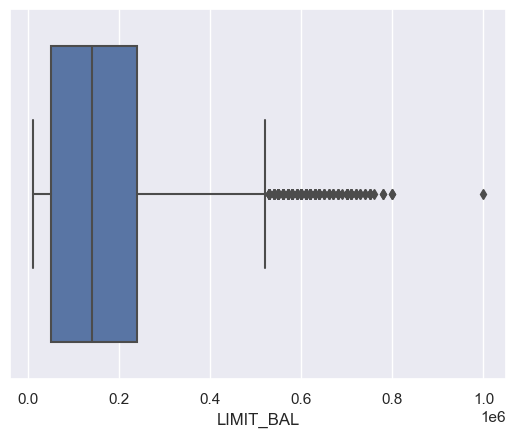

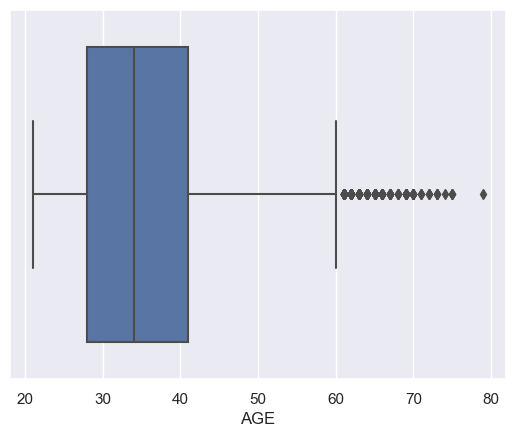

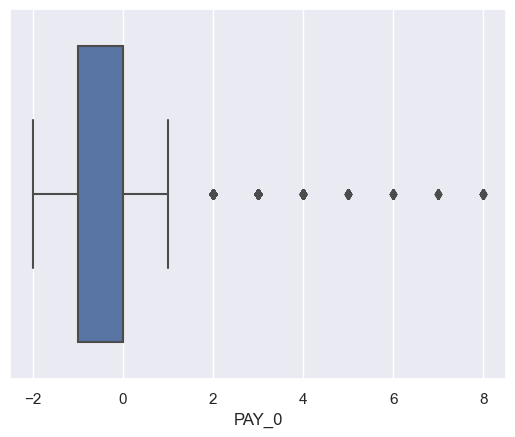

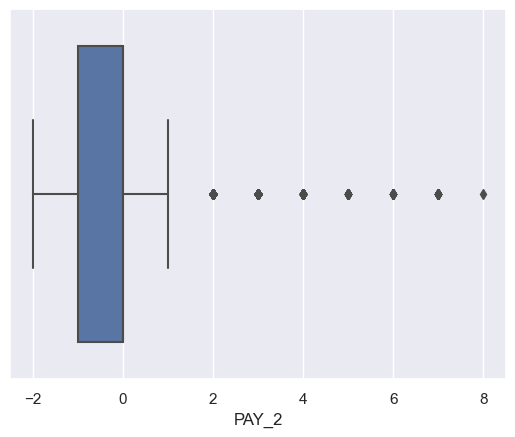

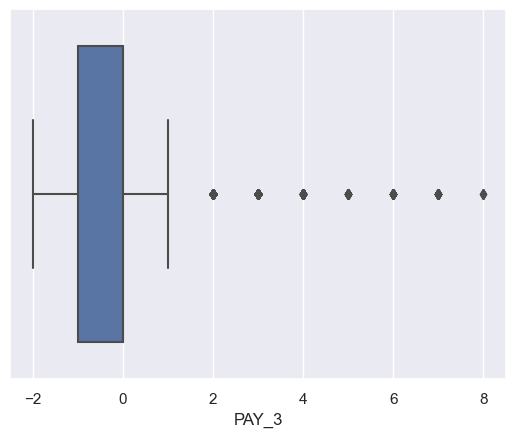

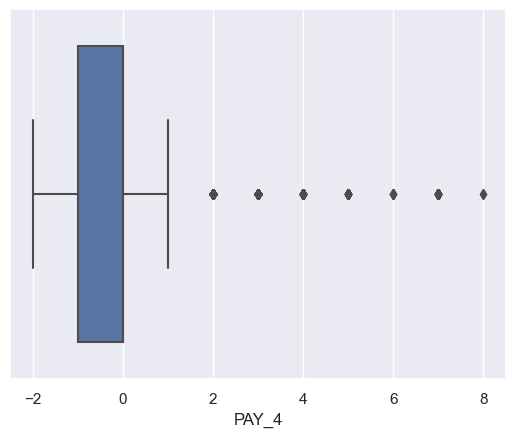

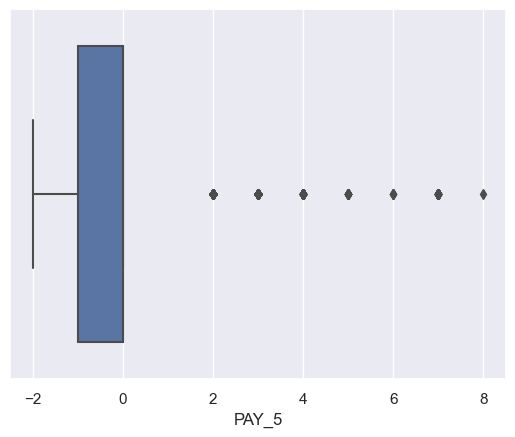

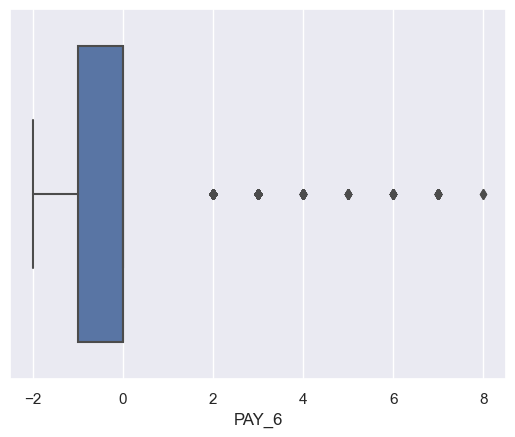

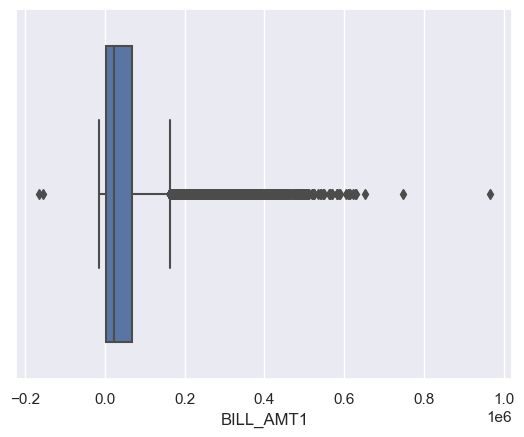

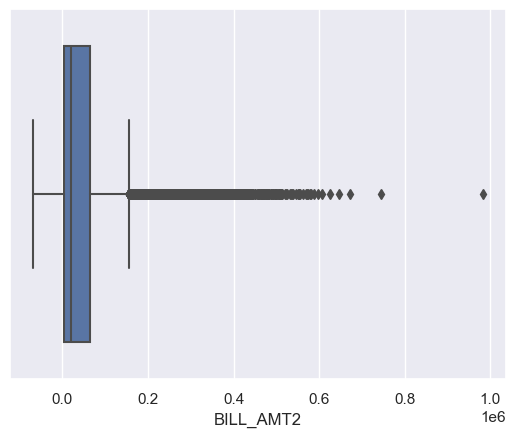

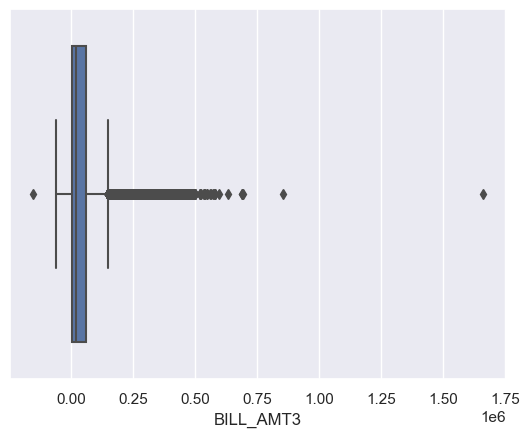

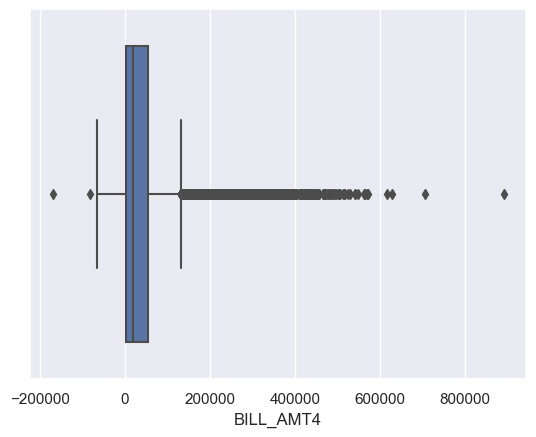

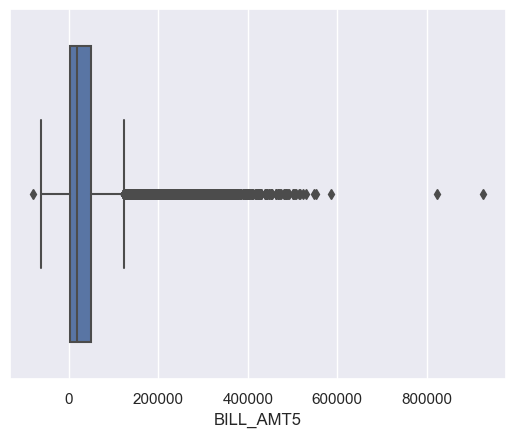

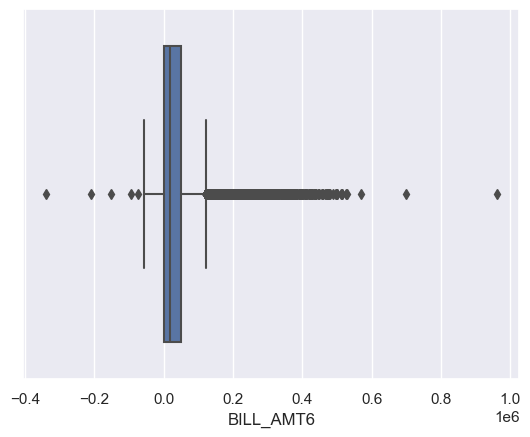

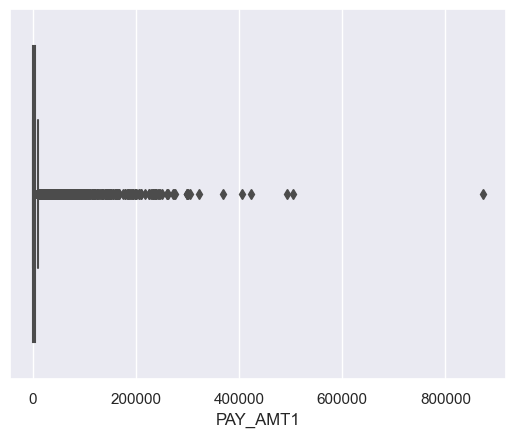

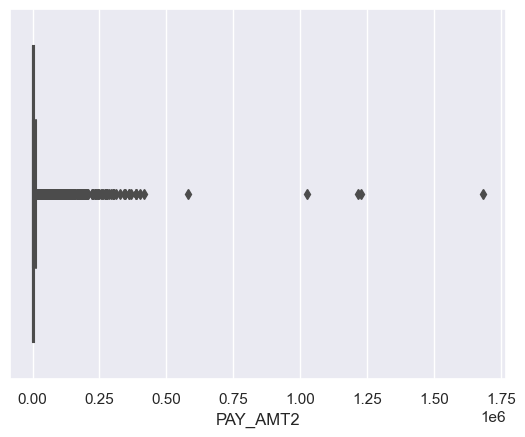

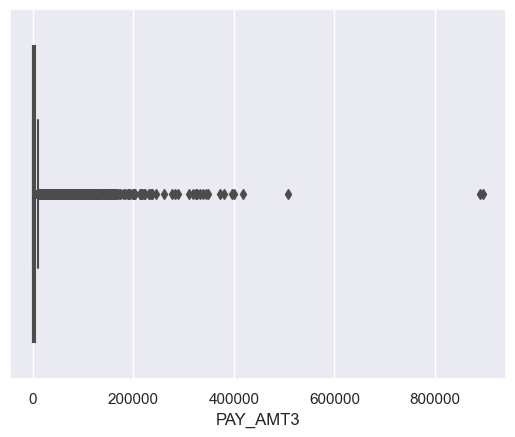

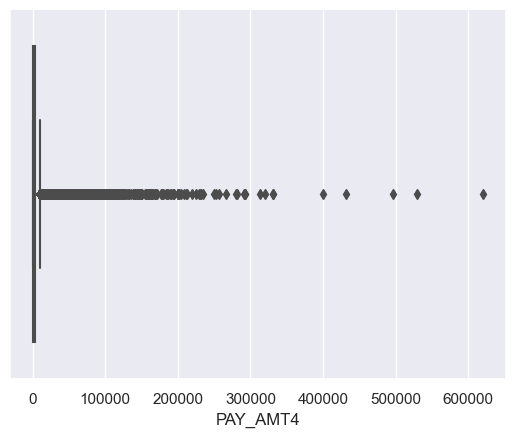

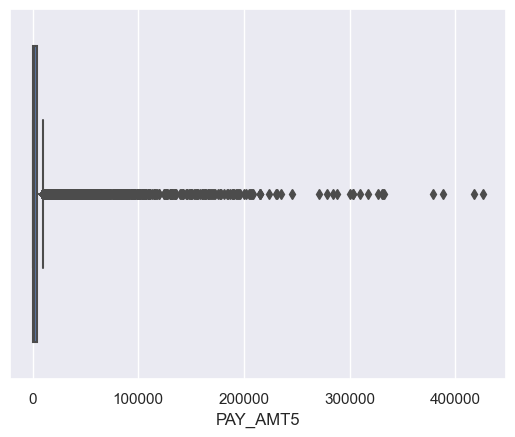

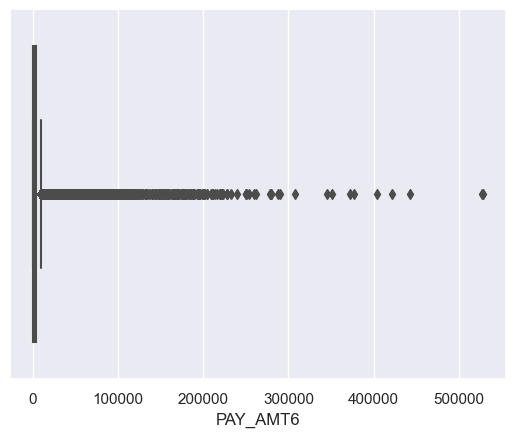

In [11]:
for i in data.columns[:-1]:
    if data[i].dtypes!=object:
        sns.boxplot(data=data, x=data[i])
        plt.show()

In [13]:
q1= data.quantile(0.25, numeric_only=True)
q3= data.quantile(0.75, numeric_only=True)
IQR =q3-q1

lower = q1-1.5*IQR
upper = q3+1.5*IQR

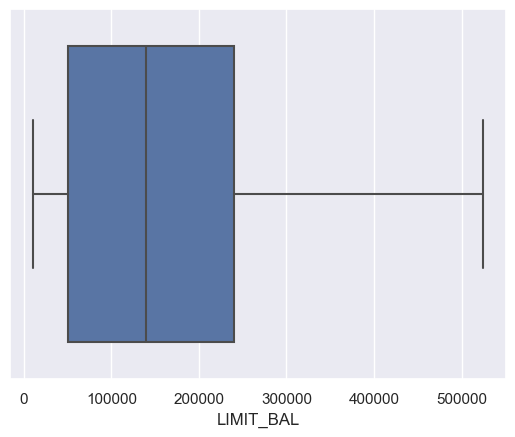

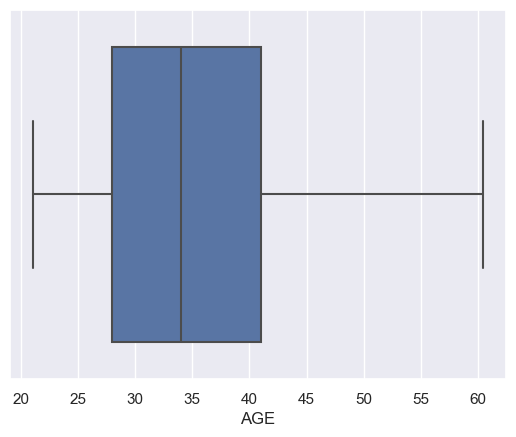

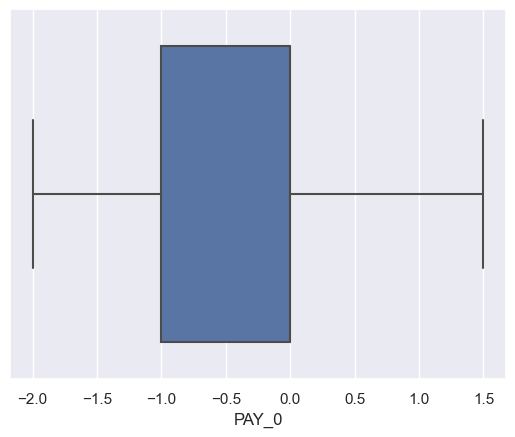

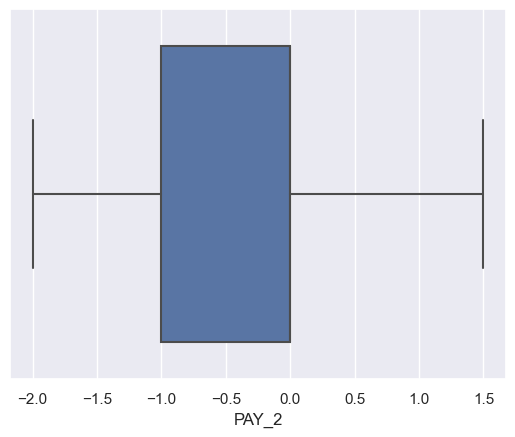

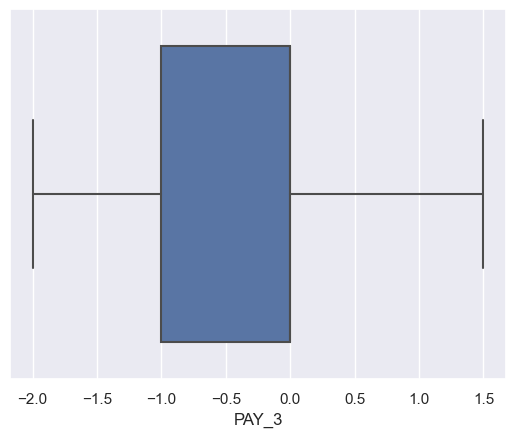

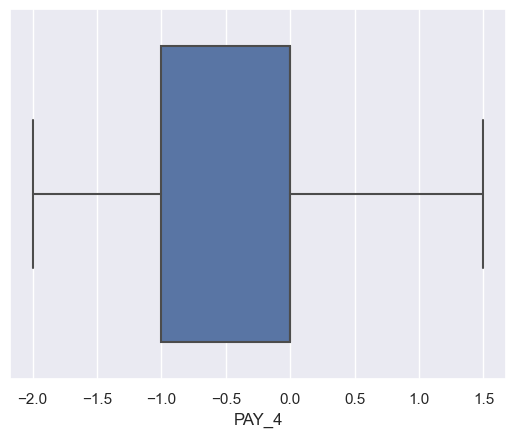

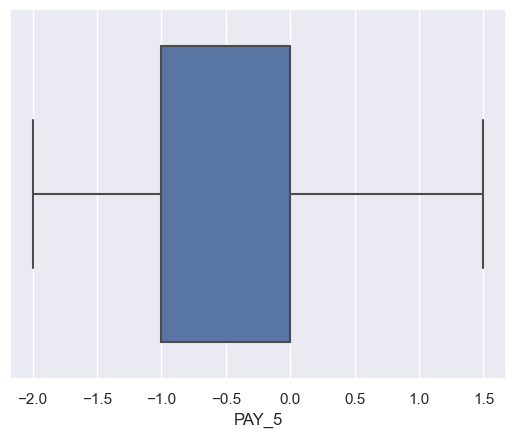

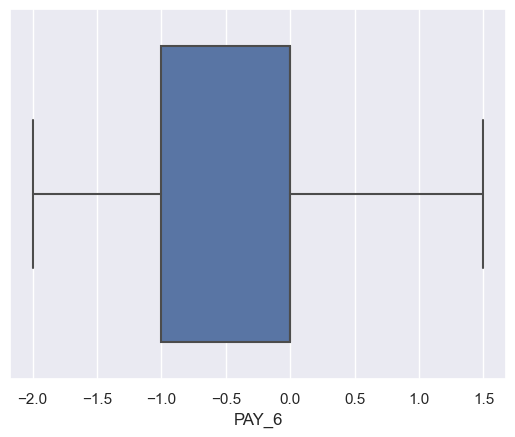

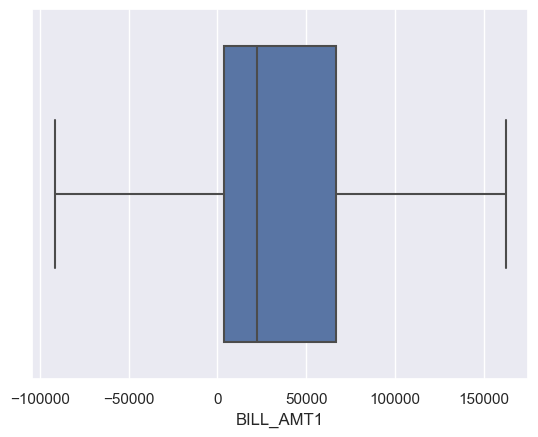

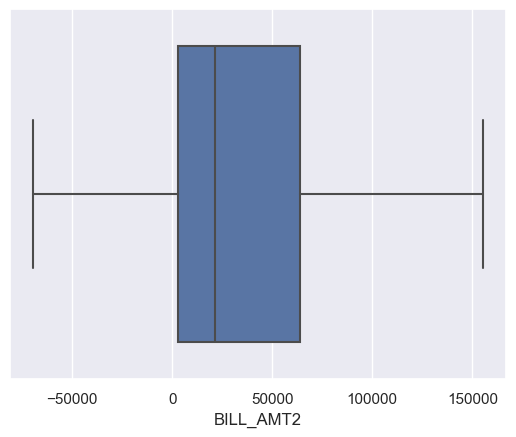

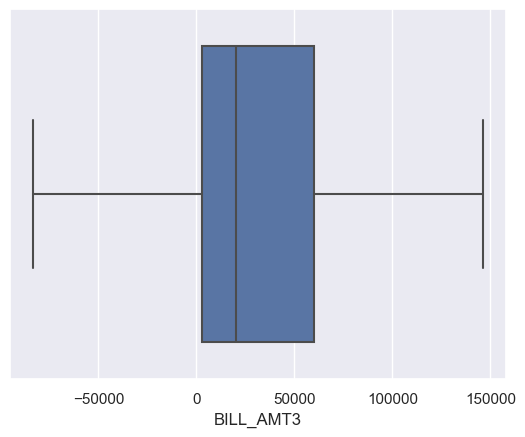

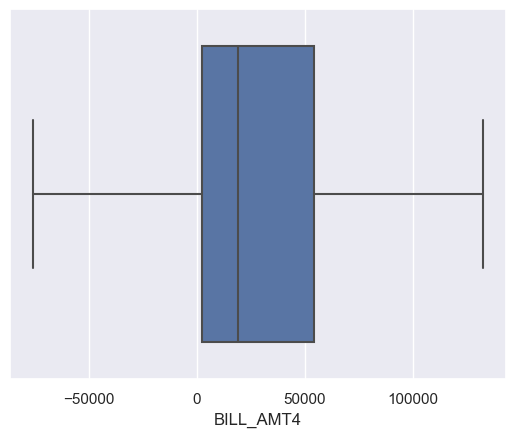

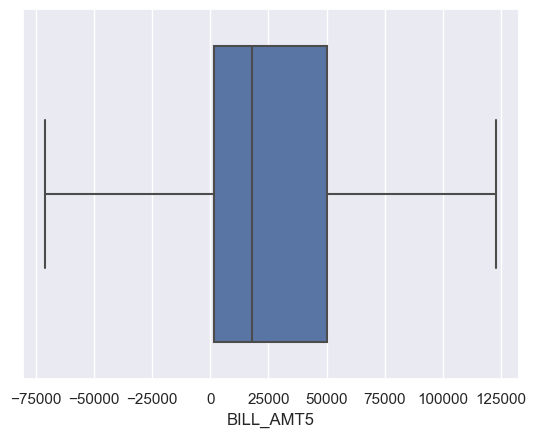

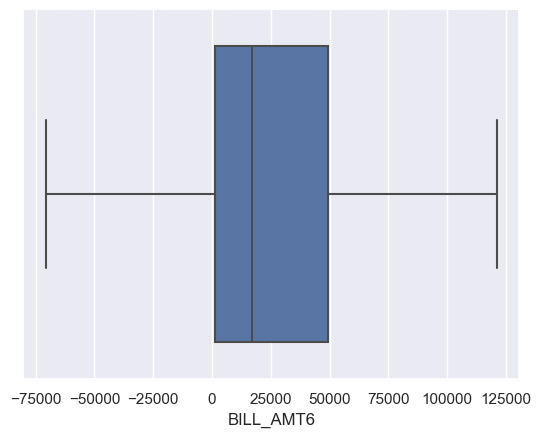

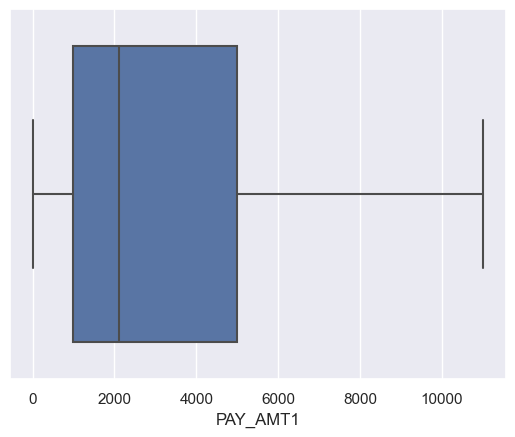

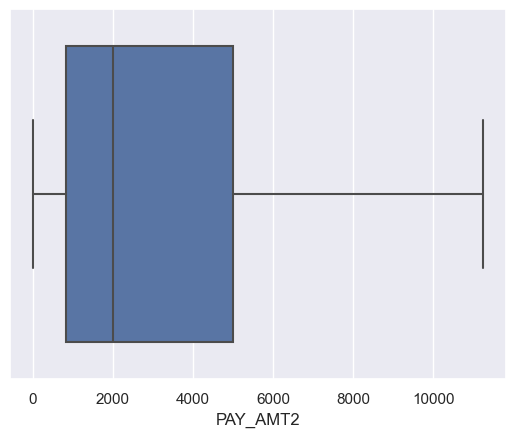

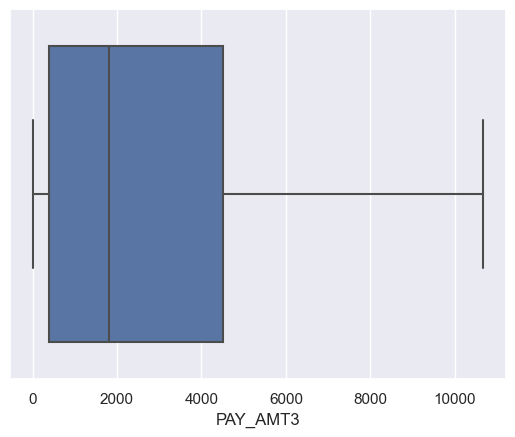

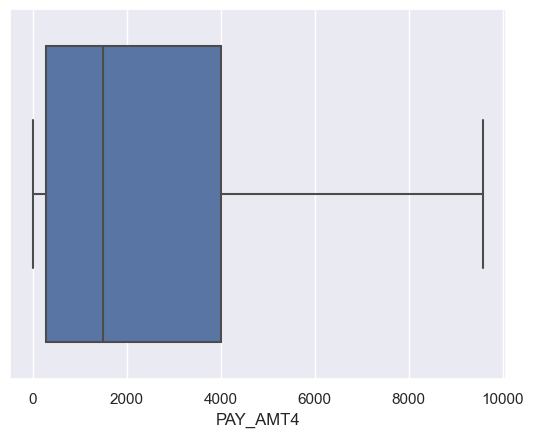

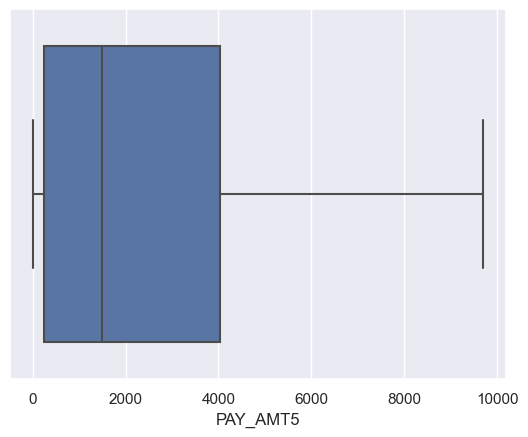

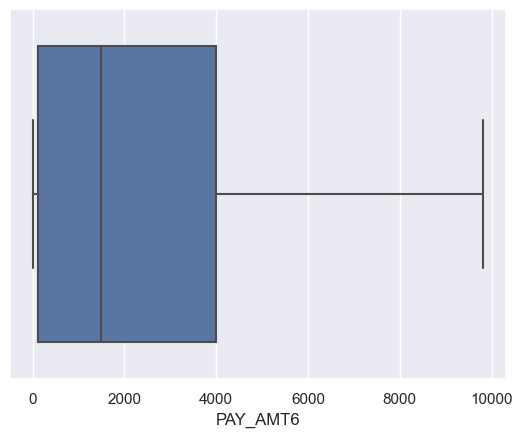

In [15]:
for i in data.columns[:-1]:
    if data[i].dtypes != object:
        data[i] = np.where(data[i]>upper[i], upper[i], data[i])
        data[i] = np.where(data[i]<lower[i], lower[i], data[i])
        sns.boxplot(data = data, x = data[i])
        plt.show()

In [17]:
from scipy import stats


for i in data.columns:
    
    if data[i].dtype in ['int64', 'float64']:
        
        kstest_statistic, kstest_p_value = stats.kstest(data[i], 'norm')
        print(f'Column: {i}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: LIMIT_BAL
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: AGE
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: PAY_0
Kolmogorov-Smirnov Test:
Test Statistic: 0.2727333333333334
p-value: 0.0
Data does not look normally distributed

Column: PAY_2
Kolmogorov-Smirnov Test:
Test Statistic: 0.35206666666666664
p-value: 0.0
Data does not look normally distributed

Column: PAY_3
Kolmogorov-Smirnov Test:
Test Statistic: 0.3595666666666667
p-value: 0.0
Data does not look normally distributed

Column: PAY_4
Kolmogorov-Smirnov Test:
Test Statistic: 0.383
p-value: 0.0
Data does not look normally distributed

Column: PAY_5
Kolmogorov-Smirnov Test:
Test Statistic: 0.4010666666666667
p-value: 0.0
Data does not look normally distributed

Column: PAY_6
Kolmogorov-Smirnov Test:
Test Statistic: 0.39736666666666665
p-value: 0.0
Data does not look normally distributed

Column: BILL_AM

In [19]:
def target_correlation(data, target, threshold=0.1):
    corr_matrix = data.corr(method='spearman', numeric_only=True)
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


target_result = target_correlation(data, 'default')

target_result

,Variable,Correlation with Target
0,LIMIT_BAL,-0.169584
1,PAY_0,0.292146
2,PAY_2,0.216689
3,PAY_3,0.194242
4,PAY_4,0.173036
5,PAY_5,0.158506
6,PAY_6,0.141810
7,PAY_AMT1,-0.159940
8,PAY_AMT2,-0.150441
9,PAY_AMT3,-0.138943


In [21]:
def intercorrelation(data, target, threshold=0.5):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman', numeric_only=True)
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
                
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

intercorrelated_result = intercorrelation(data, 'default')
intercorrelated_result

,Variable 1,Variable 2
0,BILL_AMT1,BILL_AMT2
1,PAY_3,BILL_AMT4
2,BILL_AMT3,PAY_AMT2
3,PAY_2,PAY_6
4,PAY_AMT5,PAY_AMT6
...,...,...
76,PAY_4,PAY_6
77,BILL_AMT1,PAY_AMT1
78,PAY_5,BILL_AMT3
79,PAY_5,BILL_AMT6


In [23]:
target_result.Variable.tolist()

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result
    
vif_result = calculate_vif(data, [ 
                                    'LIMIT_BAL',
                                    'PAY_0',
                                    'PAY_2',
                                    'PAY_3',
                                    'PAY_4',
                                    'PAY_5',
                                    'PAY_6',
                                    'PAY_AMT1',
                                    'PAY_AMT2',
                                    'PAY_AMT3',
                                    'PAY_AMT4',
                                    'PAY_AMT5',
                                    'PAY_AMT6'
                                        
                                        ])

vif_result

,VIF,Features
0,3.403918,LIMIT_BAL
1,1.765752,PAY_0
2,3.624630,PAY_2
3,4.780352,PAY_3
4,5.439359,PAY_4
5,5.928005,PAY_5
6,3.967601,PAY_6
7,3.795728,PAY_AMT1
8,3.909182,PAY_AMT2
9,3.661042,PAY_AMT3


In [27]:
for i in data.columns:
    if data[i].dtypes!=object:
        print(i)

LIMIT_BAL
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default


In [29]:
for i in data.columns:
    if data[i].dtypes==object:
        print(i)

SEX
EDUCATION
MARRIAGE


In [31]:
woe_data = data.copy()

In [33]:
for var in woe_data.columns[:-1]:
    if woe_data[var].dtypes != object:
        
        q1 = woe_data[var].quantile(0.25)
        q2 = woe_data[var].quantile(0.5)
        q3 = woe_data[var].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        woe_data['category_' + var] = pd.cut(woe_data[var], bins=ranges, duplicates='drop')

        grouped = woe_data.groupby(['category_' + var, 'default'])['default'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
        
        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        woe_data = woe_data.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)

C:\Users\User\AppData\Local\Temp\ipykernel_14304\3218757633.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = woe_data.groupby(['category_' + var, 'default'])['default'].count().unstack().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_14304\3218757633.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = woe_data.groupby(['category_' + var, 'default'])['default'].count().unstack().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_14304\3218757633.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. P

In [35]:
for var in woe_data.columns:
    if woe_data[var].dtypes==object:
        
        grouped = woe_data.groupby([var, 'default'])['default'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
        woe_data = woe_data.merge(grouped[[var,var+'_woe']], how='left', on=var)

woe_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,category_LIMIT_BAL,LIMIT_BAL_woe,category_AGE,AGE_woe,category_PAY_0,PAY_0_woe,category_PAY_2,PAY_2_woe,category_PAY_3,PAY_3_woe,category_PAY_4,PAY_4_woe,category_PAY_5,PAY_5_woe,category_PAY_6,PAY_6_woe,category_BILL_AMT1,BILL_AMT1_woe,category_BILL_AMT2,BILL_AMT2_woe,category_BILL_AMT3,BILL_AMT3_woe,category_BILL_AMT4,BILL_AMT4_woe,category_BILL_AMT5,BILL_AMT5_woe,category_BILL_AMT6,BILL_AMT6_woe,category_PAY_AMT1,PAY_AMT1_woe,category_PAY_AMT2,PAY_AMT2_woe,category_PAY_AMT3,PAY_AMT3_woe,category_PAY_AMT4,PAY_AMT4_woe,category_PAY_AMT5,PAY_AMT5_woe,category_PAY_AMT6,PAY_AMT6_woe,SEX_woe,EDUCATION_woe,MARRIAGE_woe
0,20000.0,female,university,married,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,3913.000,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(-inf, 50000.0]",-0.495127,"(-inf, 28.0]",-0.079053,"(0.0, inf]",-1.270421,"(0.0, inf]",-1.491367,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386,"(-inf, -1.0]",0.273392,"(-inf, -1.0]",0.231318,"(3558.75, 22381.5]",-0.046608,"(2984.75, 21200.0]",-0.028412,"(-inf, 2666.25]",-0.036016,"(-inf, 2326.75]",-0.018480,"(-inf, 1763.0]",-0.038875,"(-inf, 1256.0]",-0.015837,"(-inf, 1000.0]",-0.490526,"(-inf, 833.0]",-0.446938,"(-inf, 390.0]",-0.433563,"(-inf, 296.0]",-0.381443,"(-inf, 252.5]",-0.332013,"(-inf, 117.75]",-0.350316,0.079777,-0.091416,-0.076822
1,120000.0,female,university,single,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,2682.000,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(50000.0, 140000.0]",-0.144958,"(-inf, 28.0]",-0.079053,"(-inf, -1.0]",0.428189,"(0.0, inf]",-1.491367,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(0.0, inf]",-1.351641,"(-inf, 3558.75]",-0.050376,"(-inf, 2984.75]",-0.029935,"(2666.25, 20088.5]",0.008534,"(2326.75, 19052.0]",0.033936,"(1763.0, 18104.5]",0.083031,"(1256.0, 17071.0]",0.109864,"(-inf, 1000.0]",-0.490526,"(833.0, 2009.0]",-0.073048,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(-inf, 252.5]",-0.332013,"(1500.0, 4000.0]",0.084355,0.079777,-0.091416,0.070563
2,90000.0,female,university,single,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.000,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(50000.0, 140000.0]",-0.144958,"(28.0, 34.0]",0.168456,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465,"(22381.5, 67091.0]",-0.022307,"(2984.75, 21200.0]",-0.028412,"(2666.25, 20088.5]",0.008534,"(2326.75, 19052.0]",0.033936,"(1763.0, 18104.5]",0.083031,"(1256.0, 17071.0]",0.109864,"(1000.0, 2100.0]",0.001529,"(833.0, 2009.0]",-0.073048,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(252.5, 1500.0]",-0.093587,"(4000.0, inf]",0.487966,0.079777,-0.091416,0.070563
3,50000.0,female,university,married,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.000,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(-inf, 50000.0]",-0.495127,"(34.0, 41.0]",0.036022,"(-1.0, 0.0]",0.659061,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465,"(22381.5, 67091.0]",-0.022307,"(21200.0, 64006.25]",-0.043588,"(20088.5, 60164.75]",-0.065373,"(19052.0, 54506.0]",-0.099034,"(18104.5, 50190.5]",-0.137907,"(17071.0, 49198.25]",-0.162917,"(1000.0, 2100.0]",0.001529,"(2009.0, 5000.0]",0.102160,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(252.5, 1500.0]",-0.093587,"(117.75, 1500.0]",-0.110195,0.079777,-0.091416,-0.076822
4,50000.0,male,university,married,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.000,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0,"(-inf, 50000.0]",-0.495127,"(41.0, inf]",-0.108214,"(-inf, -1.0]",0.428189,"(-1.0, 0.0]",0.406083,"(-inf, -1.0]",0.341798,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.20091

In [37]:
woe_features = woe_data.filter(regex='_woe$', axis=1)
woe_features.columns

Index(['LIMIT_BAL_woe', 'AGE_woe', 'PAY_0_woe', 'PAY_2_woe', 'PAY_3_woe',
       'PAY_4_woe', 'PAY_5_woe', 'PAY_6_woe', 'BILL_AMT1_woe', 'BILL_AMT2_woe',
       'BILL_AMT3_woe', 'BILL_AMT4_woe', 'BILL_AMT5_woe', 'BILL_AMT6_woe',
       'PAY_AMT1_woe', 'PAY_AMT2_woe', 'PAY_AMT3_woe', 'PAY_AMT4_woe',
       'PAY_AMT5_woe', 'PAY_AMT6_woe', 'SEX_woe', 'EDUCATION_woe',
       'MARRIAGE_woe'],
      dtype='object')

In [39]:
inputs_woe = woe_features[['LIMIT_BAL_woe', 'AGE_woe', 'PAY_0_woe', 'PAY_2_woe', 'PAY_3_woe',
       'PAY_4_woe', 'PAY_5_woe', 'PAY_6_woe', 'BILL_AMT1_woe', 'BILL_AMT2_woe',
       'BILL_AMT3_woe', 'BILL_AMT4_woe', 'BILL_AMT5_woe', 'BILL_AMT6_woe',
       'PAY_AMT1_woe', 'PAY_AMT2_woe', 'PAY_AMT3_woe', 'PAY_AMT4_woe',
       'PAY_AMT5_woe', 'PAY_AMT6_woe', 'SEX_woe',
       'EDUCATION_woe', 'MARRIAGE_woe']]
output_woe = woe_data['default']

In [41]:
x_train_woe, x_test_woe, y_train_woe, y_test_woe = train_test_split(inputs_woe, output_woe, test_size=0.3, random_state=42)

In [43]:
new_data = pd.get_dummies(data, drop_first=True).astype(int)
new_data

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_male,EDUCATION_high school,EDUCATION_not educated,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single
0,20000,24,1,1,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,0,0
1,120000,26,-1,1,0,0,0,1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,1,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,11250,10000,9000,689,679,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,162389,155538,146412,88004,31237,15980,8500,11250,5003,3047,5000,1000,0,1,1,0,0,0,0,0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,1,1,0,0,0,0,1
29997,30000,37,1,1,1,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,10677,4200,2000,3100,1,1,0,0,0,1,0,1
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,11015,3409,1178,1926,9700,1804,1,1,1,0,0,0,0,0


In [45]:
inputs = new_data.drop('default', axis=1)
output = new_data['default']
x_train, x_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [47]:
data.select_dtypes(include='object').columns

Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')

In [49]:
inputs_cat = data.drop('default', axis=1)
outputs_cat = data['default']

columns_to_fill = ['SEX', 'EDUCATION', 'MARRIAGE']

inputs_cat[columns_to_fill] = inputs_cat[columns_to_fill].fillna('Missing Value')

x_train_cat, x_test_cat, y_train_cat, y_test_cat = train_test_split(inputs_cat, outputs_cat, test_size=0.3, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm

In [53]:
models = []
logistic_reg_def = LogisticRegression()
xgb_classifier_def = XGBClassifier()
lgb_classifier_def = LGBMClassifier()
catboost_classifier_def = CatBoostClassifier()
catboost_custom = CatBoostClassifier(cat_features=['SEX', 'EDUCATION', 'MARRIAGE'])
random_forest_classifier_def = RandomForestClassifier()
svc_classifier_def = SVC(probability=True)

models.extend([
    ('Logistic_Regression', logistic_reg_def),
    ('XGBoost', xgb_classifier_def),
    ('LightGBM', lgb_classifier_def),
    ('CatBoost', catboost_classifier_def),
    ('CatBoost_Custom', catboost_custom),
    ('Random Forest', random_forest_classifier_def),
    ('SVC', svc_classifier_def)
])

In [55]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report


def train_and_evaluate_model(model_name, model, x_train, y_train, x_test, y_test):
    try:
        model.fit(x_train, y_train)
        
        y_pred_train = model.predict(x_train)
        y_prob_train = model.predict_proba(x_train)[:, 1]

        roc_prob_train = roc_auc_score(y_train, y_prob_train)
        gini_prob_train = roc_prob_train * 2 - 1
        confusion_matrix_result_train = confusion_matrix(y_train, y_pred_train)
        classification_report_result_train = classification_report(y_train, y_pred_train)
        
        print(f'Model Performance for {model_name}')
        print('Train Gini prob is', gini_prob_train * 100)
        print(classification_report_result_train)
        print(confusion_matrix_result_train)

        y_pred_test = model.predict(x_test)
        y_prob_test = model.predict_proba(x_test)[:, 1]

        roc_prob_test = roc_auc_score(y_test, y_prob_test)
        gini_prob_test = roc_prob_test * 2 - 1
        confusion_matrix_result_test = confusion_matrix(y_test, y_pred_test)
        classification_report_result_test = classification_report(y_test, y_pred_test)

        print(f'Model Performance for {model_name}')
        print('Test Gini prob is', gini_prob_test * 100)
        print(classification_report_result_test)
        print(confusion_matrix_result_test)

        return [gini_prob_train, gini_prob_test]

    except Exception as e:
        print(f"An error occurred while evaluating the model {model_name}: {e}")
        return None

In [57]:
gini_df = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models:
    if model_name == 'CatBoost_Custom':
        gini_prob = train_and_evaluate_model(model_name, model, x_train_cat, y_train_cat, x_test_cat, y_test_cat)
    elif model_name == 'Random Forest' or model_name == 'SVC' or model_name == 'Logistic_Regression':
        x_train_filled = x_train.copy()
        x_test_filled = x_test.copy()
        for i in x_train_filled.columns:
            if x_train_filled[i].dtype == object:
                x_train_filled[i].fillna(x_train_filled[i].mode()[0], inplace=True)
                x_test_filled[i].fillna(x_test_filled[i].mode()[0], inplace=True)
            else:
                x_train_filled[i].fillna(x_train_filled[i].mean(), inplace=True)
                x_test_filled[i].fillna(x_test_filled[i].mean(), inplace=True)
        gini_prob = train_and_evaluate_model(model_name, model, x_train_filled, y_train, x_test_filled, y_test)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, x_train, y_train, x_test, y_test)
                                             
    if gini_prob is not None:
        gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted = gini_df.sort_values(by='Test Gini', ascending=False)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Temp\ipykernel_14304\3203330908.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]

Model Performance for Logistic_Regression
Train Gini prob is 34.355974315240424
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     16324
           1       0.60      0.01      0.02      4676

    accuracy                           0.78     21000
   macro avg       0.69      0.50      0.45     21000
weighted avg       0.74      0.78      0.68     21000

[[16293    31]
 [ 4629    47]]
Model Performance for Logistic_Regression
Test Gini prob is 33.602359693877546
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.42      0.01      0.01      1960

    accuracy                           0.78      9000
   macro avg       0.60      0.50      0.45      9000
weighted avg       0.70      0.78      0.69      9000

[[7021   19]
 [1946   14]]
Model Performance for XGBoost
Train Gini prob is 92.13430439502555
              precision    recall  f1-score   support

       

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Performance for SVC
Train Gini prob is 20.845727158068783
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     16324
           1       0.00      0.00      0.00      4676

    accuracy                           0.78     21000
   macro avg       0.39      0.50      0.44     21000
weighted avg       0.60      0.78      0.68     21000

[[16324     0]
 [ 4676     0]]
Model Performance for SVC
Test Gini prob is 13.415251043599241
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000

[[7040    0]
 [1960    0]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
gini_df_sorted

,Model,Train Gini,Test Gini
4,CatBoost_Custom,0.781023,0.552094
2,LightGBM,0.776101,0.545859
3,CatBoost,0.804402,0.545458
5,Random Forest,0.999995,0.505011
1,XGBoost,0.921343,0.501711
0,Logistic_Regression,0.343560,0.336024
6,SVC,0.208457,0.134153


In [64]:
pip install optuna


   ---------------------------------------- 0.0/362.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/362.8 kB ? eta -:--:--
   --- ----------------------------------- 30.7/362.8 kB 640.0 kB/s eta 0:00:01
   ------ -------------------------------- 61.4/362.8 kB 544.7 kB/s eta 0:00:01
   ----------- -------------------------- 112.6/362.8 kB 652.2 kB/s eta 0:00:01
   ----------- -------------------------- 112.6/362.8 kB 652.2 kB/s eta 0:00:01
   -------------------- ----------------- 194.6/362.8 kB 784.3 kB/s eta 0:00:01
   ------------------------ ------------- 235.5/362.8 kB 846.9 kB/s eta 0:00:01
   ---------------------------- --------- 276.5/362.8 kB 811.7 kB/s eta 0:00:01
   -------------------------------- ----- 307.2/362.8 kB 863.3 kB/s eta 0:00:01
   -------------------------------------  358.4/362.8 kB 855.4 kB/s eta 0:00:01
   -------------------------------------  358.4/362.8 kB 855.4 kB/s eta 0:00:01
   -------------------------------------  358.4/362.8 kB

In [66]:
from sklearn.model_selection import cross_val_score
import optuna
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5,1), 
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5,1),
        'gamma': trial.suggest_int('gamma', 0,5)     
}
    xgb_clf = XGBClassifier(**param)

    auc = cross_val_score(xgb_clf, x_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBClassifier(**best_params)

[I 2024-09-13 15:12:59,699] A new study created in memory with name: no-name-4ea45f20-cab4-4c0b-a18a-317ef89f401b
C:\Users\User\AppData\Local\Temp\ipykernel_14304\3797074548.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\User\AppData\Local\Temp\ipykernel_14304\3797074548.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5,1),
C:\Users\User\AppData\Local\Temp\ipykernel_14304\3797074548.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

Best trial:
  Value: 0.781
  Params:  {'n_estimators': 723, 'learning_rate': 0.071336158454659, 'max_depth': 3, 'subsample': 0.6544151044016051, 'colsample_bytree': 0.9451844845577719, 'gamma': 5}


In [68]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100)
    }

    lgb_clf = LGBMClassifier(**param)

    auc = cross_val_score(lgb_clf, x_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMClassifier(**best_params)

[I 2024-09-13 15:15:48,916] A new study created in memory with name: no-name-9e54eedb-2bfd-4a90-857c-ab52dd6373db
C:\Users\User\AppData\Local\Temp\ipykernel_14304\596062953.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2024-09-13 15:16:00,039] Trial 0 finished with value: 0.7253094709589718 and parameters: {'n_estimators': 529, 'learning_rate': 0.5163105082128422, 'max_depth': 7, 'num_leaves': 39}. Best is trial 0 with value: 0.7253094709589718.
C:\Users\User\AppData\Local\Temp\ipykernel_14304\596062953.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguni

Best trial:
  Value: 0.780
  Params:  {'n_estimators': 115, 'learning_rate': 0.06765791045249454, 'max_depth': 4, 'num_leaves': 30}


In [70]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), 
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']) 
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, x_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostClassifier(**best_params)

[I 2024-09-13 15:18:28,549] A new study created in memory with name: no-name-eba47c20-eeae-4713-9bfc-94db5742fcc0
C:\Users\User\AppData\Local\Temp\ipykernel_14304\1876953250.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\User\AppData\Local\Temp\ipykernel_14304\1876953250.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-09-13 15:18:57,181] Trial 0 finished with value: 0.7216350694279667 and parameters: {'iterations': 247, 'learning_rate': 0.7107335343307366, 'depth': 8, 'l2_leaf_reg': 1.8591748276642301, 'loss_fu

Best trial:
  Value: 0.780
  Params:  {'iterations': 156, 'learning_rate': 0.07314699175615387, 'depth': 7, 'l2_leaf_reg': 1.9387836450144276, 'loss_function': 'Logloss'}


In [72]:
def best_params_for_model(trial):

    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
    }

    rf_clf = RandomForestClassifier(**param)

    auc = cross_val_score(rf_clf, x_train_filled, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=50)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model = RandomForestClassifier(**best_params)

[I 2024-09-13 15:24:40,545] A new study created in memory with name: no-name-5539a666-e36e-434c-85b1-579ffbf177c7
[I 2024-09-13 15:24:52,947] Trial 0 finished with value: 0.7748903260292916 and parameters: {'n_estimators': 280, 'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.7748903260292916.
[I 2024-09-13 15:24:56,795] Trial 1 finished with value: 0.7693453151693872 and parameters: {'n_estimators': 109, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7748903260292916.
[I 2024-09-13 15:25:12,566] Trial 2 finished with value: 0.7699168337725866 and parameters: {'n_estimators': 608, 'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.7748903260292916.
[I 2024-09-13 15:25:35,785] Trial 3 finished with value: 0.7698953287688839 and parameters: {'n_estimators': 785, 'max_depth': 4, 'min

Best trial:
  Value: 0.780
  Params:  {'n_estimators': 643, 'max_depth': 10, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


In [74]:
def best_params_for_model(trial):
     
    param = {
        'C': trial.suggest_loguniform('C', 0.1, 10), 
        'kernel': trial.suggest_categorical('kernel', [ 'poly', 'rbf', 'sigmoid']),  
        'degree': trial.suggest_int('degree', 2, 5), 
        'gamma': trial.suggest_categorical('gamma', ['auto', 'scale']),  
    }

    
    svc_clf = SVC(**param)

    score = cross_val_score(svc_clf, x_train, y_train, cv=3, scoring='r2', n_jobs=-1).mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)
best_svc_model = SVC(**best_params)

[I 2024-09-13 15:59:25,398] A new study created in memory with name: no-name-cf4a7a47-1fda-4ed6-9d86-d89b296f45b4
C:\Users\User\AppData\Local\Temp\ipykernel_14304\1397160656.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 10),
[I 2024-09-13 15:59:38,887] Trial 0 finished with value: -0.6888848965374873 and parameters: {'C': 8.615546539025583, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 'auto'}. Best is trial 0 with value: -0.6888848965374873.


Best trial:
  Value: -0.689
  Params:  {'C': 8.615546539025583, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 'auto'}


In [76]:
models_optimized = []

models_optimized.extend([
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model),
    ('Random Forest Optuna', best_rf_model),
    ('SVC Optuna', best_svc_model)
])

In [78]:
gini_df_optuna = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models_optimized:
    if model_name == 'RandomForest Optuna' or 'SVC Optuna':
        gini_prob = train_and_evaluate_model(model_name, model, x_train_filled, y_train, x_test_filled, y_test)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, x_train, y_train, x_test, y_test)
        
    if gini_prob is not None:
        gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted_optuna = gini_df_optuna.sort_values(by='Test Gini', ascending=False)

gini_df_sorted_optuna

Model Performance for XGBoost Optuna
Train Gini prob is 62.245602784000376
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     16324
           1       0.67      0.39      0.49      4676

    accuracy                           0.82     21000
   macro avg       0.76      0.67      0.69     21000
weighted avg       0.80      0.82      0.80     21000

[[15411   913]
 [ 2852  1824]]
Model Performance for XGBoost Optuna
Test Gini prob is 54.80756464517624
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.61      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

[[6592  448]
 [1246  714]]


C:\Users\User\AppData\Local\Temp\ipykernel_14304\153853791.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3191
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

,Model,Train Gini,Test Gini
2,CatBoost Optuna,0.703556,0.548695
0,XGBoost Optuna,0.622456,0.548076
1,LightGBM Optuna,0.636220,0.546987
3,Random Forest Optuna,0.694912,0.540884


In [80]:
gini_df_sorted_optuna

,Model,Train Gini,Test Gini
2,CatBoost Optuna,0.703556,0.548695
0,XGBoost Optuna,0.622456,0.548076
1,LightGBM Optuna,0.636220,0.546987
3,Random Forest Optuna,0.694912,0.540884


In [82]:
final_review = pd.concat([gini_df_sorted,gini_df_sorted_optuna], axis=0)

final_review_sorted = final_review.sort_values(by='Test Gini', ascending=False)
final_review_sorted.reset_index(drop=True, inplace=True)

final_review_sorted

,Model,Train Gini,Test Gini
0,CatBoost_Custom,0.781023,0.552094
1,CatBoost Optuna,0.703556,0.548695
2,XGBoost Optuna,0.622456,0.548076
3,LightGBM Optuna,0.636220,0.546987
4,LightGBM,0.776101,0.545859
5,CatBoost,0.804402,0.545458
6,Random Forest Optuna,0.694912,0.540884
7,Random Forest,0.999995,0.505011
8,XGBoost,0.921343,0.501711
9,Logistic_Regression,0.343560,0.336024


In [88]:
from mlxtend.classifier import StackingCVClassifier

clf1 = best_rf_model
clf2 = best_lgb_model

In [90]:
meta_classifier = best_xgb_model

In [92]:
stacking_classifier = StackingCVClassifier(classifiers=[clf1, clf2],
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [94]:
train_and_evaluate_model('Stacking Classifier with Random Forest Optuna, LGBM Optuna and XGBoost Optuna', stacking_classifier, x_train_filled, y_train, x_test_filled, y_test)

Fitting 2 classifiers...
Fitting classifier1: randomforestclassifier (1/2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: lgbmclassifier (2/2)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3740, number of negative: 13060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3191
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222619 -> initscore=-1.250469
[LightGBM] [Info] Start training from score -1.250469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3191
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[0.6653096911158953, 0.5442889030612243]

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

variables = []
train_gini_scores = []
test_gini_scores = []


for i in x_train_filled.columns:
    x_train_single_var = x_train[[i]]
    x_test_single_var = x_test[[i]]

    best_xgb_model.fit(x_train_single_var, y_train)
    y_pred_train_single_var = best_xgb_model.predict_proba(x_train_single_var)[:, 1]
    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    y_pred_test_single_var = best_xgb_model.predict_proba(x_test_single_var)[:, 1]
    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1

    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)

results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini': train_gini_scores,
    'Test Gini': test_gini_scores
})

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted

,Variable,Train Gini,Test Gini
2,PAY_0,0.4017,0.3886
3,PAY_2,0.3125,0.2756
4,PAY_3,0.2759,0.2427
5,PAY_4,0.2415,0.2283
0,LIMIT_BAL,0.2438,0.2270
14,PAY_AMT1,0.2425,0.2199
6,PAY_5,0.2174,0.2192
15,PAY_AMT2,0.2253,0.2111
7,PAY_6,0.2076,0.1914
16,PAY_AMT3,0.2046,0.1881


In [100]:
results_df_sorted.Variable.tolist()

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'LIMIT_BAL',
 'PAY_AMT1',
 'PAY_5',
 'PAY_AMT2',
 'PAY_6',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'BILL_AMT1',
 'BILL_AMT5',
 'BILL_AMT6',
 'BILL_AMT4',
 'AGE',
 'BILL_AMT3',
 'SEX_male',
 'BILL_AMT2',
 'MARRIAGE_single',
 'EDUCATION_high school',
 'EDUCATION_university',
 'EDUCATION_others',
 'MARRIAGE_others',
 'EDUCATION_not educated']

In [104]:
fin_input = new_data[['PAY_0','PAY_2','PAY_3','PAY_4','LIMIT_BAL','PAY_AMT1','PAY_5','PAY_AMT2','PAY_6','PAY_AMT3','PAY_AMT4', 'PAY_AMT5','PAY_AMT6']]
fin_output =data['default']

x_train_uni, x_test_uni, y_train_uni, y_test_uni = train_test_split(fin_input, fin_output, test_size=0.3, random_state=42)

model_fin = best_xgb_model.fit(x_train_uni,y_train_uni)

In [106]:
train_and_evaluate_model('XGboost for selected features', model_fin, x_train_uni, y_train_uni, x_test_uni, y_test_uni)

Model Performance for XGboost for selected features
Train Gini prob is 58.60728266923287
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     16324
           1       0.65      0.38      0.48      4676

    accuracy                           0.82     21000
   macro avg       0.75      0.66      0.69     21000
weighted avg       0.80      0.82      0.80     21000

[[15369   955]
 [ 2877  1799]]
Model Performance for XGboost for selected features
Test Gini prob is 53.26878478664192
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.37      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

[[6593  447]
 [1239  721]]


[0.5860728266923287, 0.5326878478664192]